# Assignment 9: Unsupervised Learning [_/100 Marks]

### <span style="color:red">Please do it without relying on AI tools and/or friends.</span>

### Once you are finished, ensure to complete the following steps:

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

---
## Question 1 - <span style="color:green">[100]</span>

You are going to use unsupervised techniques to identify and label the unknown cells in the data set `A9_data.csv` based on the few known cells.

---
### <span style="color:orange">Data Dictionary</span>

The given dataset, `A9_data.csv`, lists certain geometrical characteristics of different cells (each row represents one sample, *i.e.*, a cell) and has the following attributes:

|Column Index| Attribute | Description |
| --- | --- | --- |
|0|`cell_feature_1`|Some measurement pertaining to cell shape (numerical attribute).|
|1|`cell_feature_2`|Some measurement pertaining to cell shape (numerical attribute).|
|2|`cell_feature_3`|Some measurement pertaining to cell shape (numerical attribute).|
|3|`cell_feature_4`|Some measurement pertaining to cell shape (numerical attribute).|
|4|`cell_feature_5`|Some measurement pertaining to cell shape (numerical attribute).|
|5|`cell_feature_6`|Some measurement pertaining to cell shape (numerical attribute).|
|6|`cell_type`|Type of cell (categorical attribute).|


---
### <span style="color:orange">Toolbox</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.preprocessing as prep
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
from IPython.display import display
%matplotlib inline

from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

seed = 1201 # work with this seed throughout your work
np.random.seed(seed)

### Q1.1 - <span style="color:red">[10]</span> - Load the dataset as a pandas dataframe and name it `dfc`. Display the first five rows of `dfc`. How many observations are there in `dfc` and for how many of them the cell type is known? Name the known cell types. Then, create a copy of `dfc` and name it `data` and drop the attribute "cell_type" from `data`.

In [2]:
dfc = pd.read_csv('A9_data.csv')

dfc.head(5)

,cell_feature_1,cell_feature_2,cell_feature_3,cell_feature_4,cell_feature_5,cell_feature_6,cell_type
0,-8.969499,-6.294874,-0.609292,-0.538988,3.045112,3.944128,D
1,3.559447,-8.800391,-9.503687,3.743288,-5.254547,-0.528753,unknown
2,4.198048,-7.418047,-8.449960,3.376891,-7.041192,0.586114,unknown
3,-1.580189,4.640504,-3.702296,7.572398,6.572311,-2.315348,unknown
4,-1.762427,5.716517,-3.511441,9.449469,6.463332,-3.510625,unknown


In [3]:
print(f"There are {len(dfc)} rows")

types = dfc['cell_type']

print(f"There are {len(dfc[types != 'unknown'])} observations for which the cell type is known")

print(f"There are {len(set(types)) - 1} known cell types")

print("The known cell types are " + str(set(types) - set(['unknown'])))

data = dfc.drop('cell_type', axis = 1)

There are 1200 rows
There are 4 observations for which the cell type is known
There are 4 known cell types
The known cell types are {'D', 'A', 'B', 'C'}


### Q1.2 - <span style="color:red">[10]</span> - Use `seaborn.pairplot` to investigate pairwise relationships in the dataframe `data`. Could we use this plots to reliably say how many clusters are there in the data? Why?

Hint: You could set the argument `corner` to `True` to speed up the plotting.

The first instinct would be to assume that there are five clusters. But this is a qualitative, not a quantitative observation. to actually deduce that there are 5 clusters, we'd need some distance measure, which we don't have.


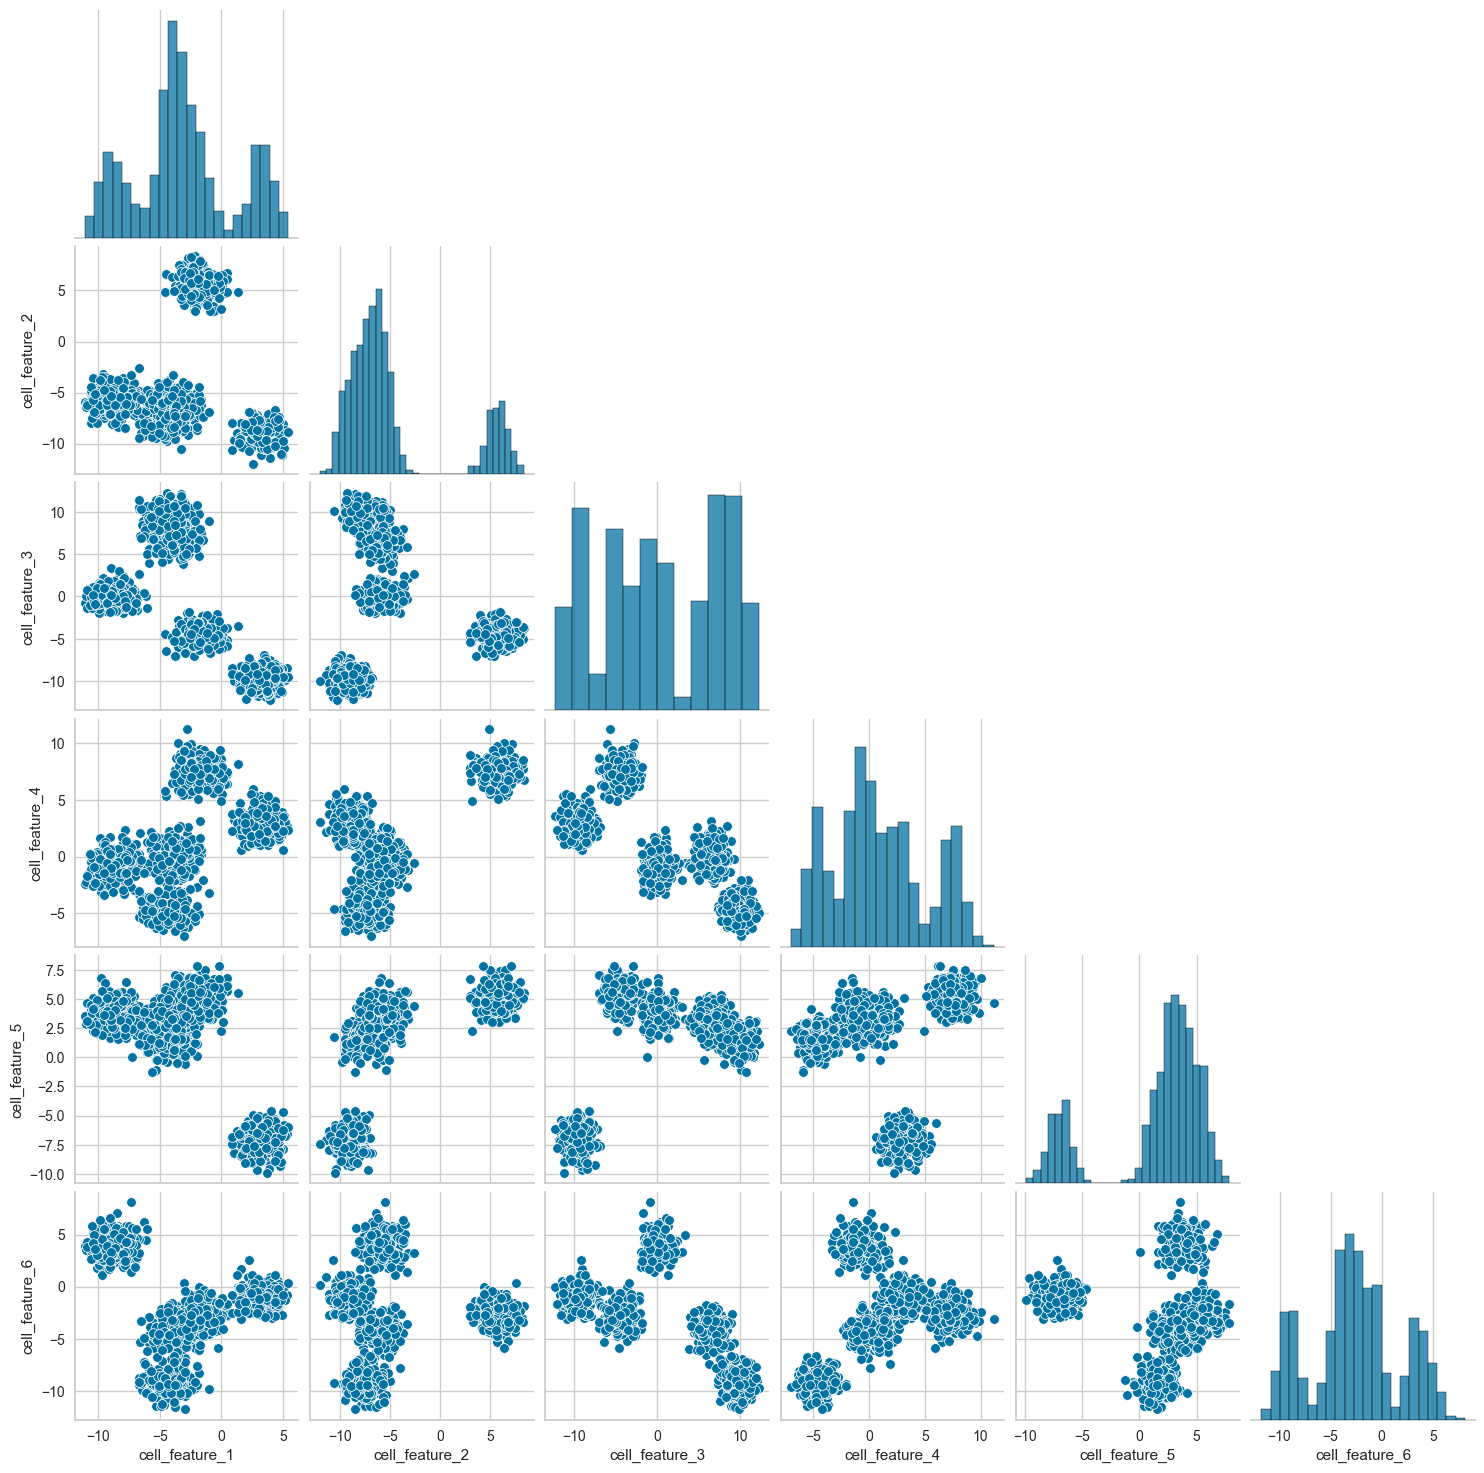

In [4]:
sns.pairplot(data, corner=True)

print("The first instinct would be to assume that there are five clusters. But this is a qualitative, not a quantitative observation. \
to actually deduce that there are 5 clusters, we'd need some distance measure, which we don't have.")

### Q1.3 - <span style="color:red">[15]</span> - Cluster the dataframe `data` using `KMeans` with `k` in $[2, 3, 4, 5, 6]$. Plot inertia versus `k` as well as silhouette score versus `k` in separate plot windows. Solely relying on these two plots, what are the best **two** values that you would conclude for `k`? Why?

From the plots, the best values for k are 4 or 5. This is because the maximum silhouette score is achieved at k = 4,       and the 'elbow' of the inertia plot is at k = 4. But, there is another elbow of the inertia plot at k = 5, and the       silhouette value at k = 5 is also high.


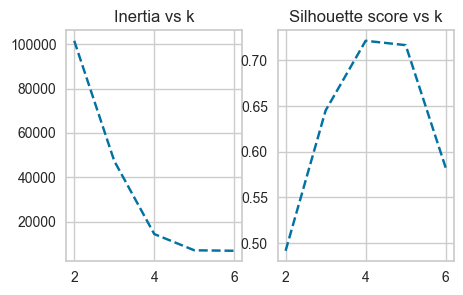

In [5]:
#

from sklearn.metrics import silhouette_score

inertias = []
sillhouettes = []
k = np.arange(2,7,1)

# Fit clusterers
for i in range(2,7):
    KClusterer = KMeans(n_clusters=i, random_state = seed).fit(data)
    
    inertias.append(KClusterer.inertia_)
    sillhouettes.append(silhouette_score(data, KClusterer.predict(data)))
    
# Generate plots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))

ax1.plot(k, inertias, linestyle='dashed')
ax1.set_title("Inertia vs k")
ax2.plot(k, sillhouettes, linestyle='dashed')
ax2.set_title("Silhouette score vs k")

print("From the plots, the best values for k are 4 or 5. This is because the maximum silhouette score is achieved at k = 4, \
      and the 'elbow' of the inertia plot is at k = 4. But, there is another elbow of the inertia plot at k = 5, and the \
      silhouette value at k = 5 is also high.")

### Q1.4 - <span style="color:red">[20]</span> - Do the following steps on the dataframe `data`:
1. Plot the silhouette diagrams (*i.e.*, the stacked silhouette scores for clusters members) for the choices of `k` which you concluded in the previous question (*i.e.*, Q1.2).
2. Do a 2-component PCA and plot PC1 against PC2.
3. Do a 2-component t-SNE with a perplexity of 100 and plot the first embedding against the second embedding.
4. Interpret, in writing, the results of the previous 3 steps. What would be your final choice for the number of clusters (`k`)?

The silhouette score for K-means is 0.722


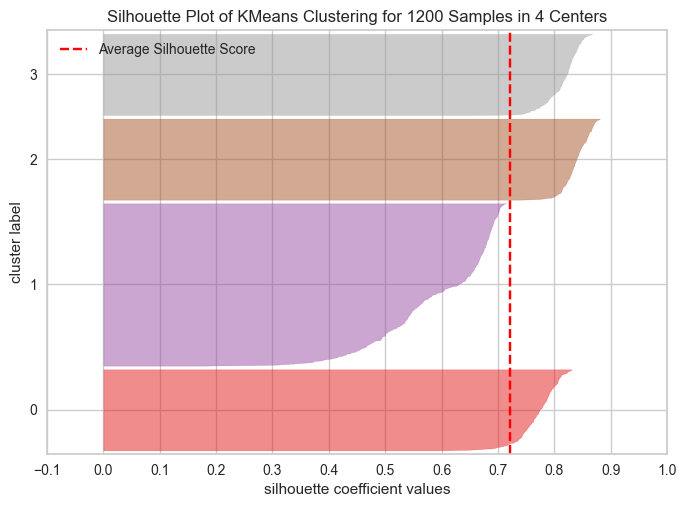

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1200 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [6]:
# From Lab 9

# 4 clusters
KClusterer = KMeans(n_clusters = 4, random_state=seed).fit(data)

predicted = KClusterer.predict(data)

kmeans_sil_avg = silhouette_score(data, predicted)
print('The silhouette score for K-means is %.3f' % kmeans_sil_avg)

# We can plot a silhouette plot for k-means using yellowbricks
visualizer = SilhouetteVisualizer(KClusterer) # Get the kmeans model
visualizer.fit(data) # Pass the scaled data
visualizer.show() # show the plot

The silhouette score for K-means is 0.717


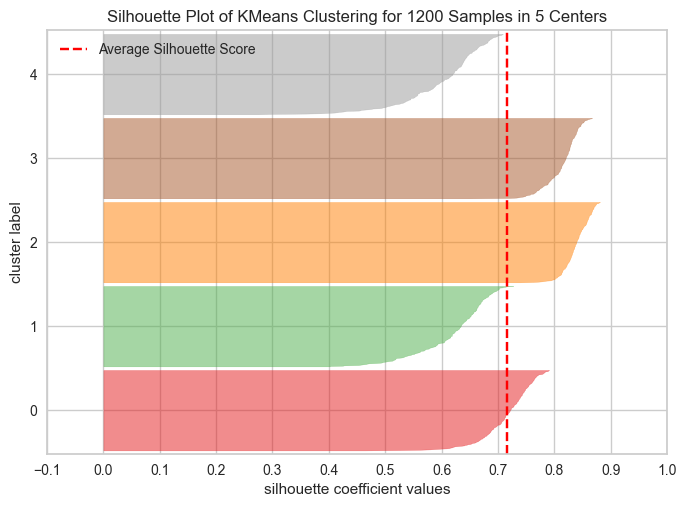

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [7]:
# From Lab 9

# 5 clusters
KClusterer = KMeans(n_clusters = 5, random_state=seed).fit(data)

predicted = KClusterer.predict(data)

kmeans_sil_avg = silhouette_score(data, predicted)
print('The silhouette score for K-means is %.3f' % kmeans_sil_avg)

# We can plot a silhouette plot for k-means using yellowbricks
visualizer = SilhouetteVisualizer(KClusterer) # Get the kmeans model
visualizer.fit(data) # Pass the scaled data
visualizer.show() # show the plot

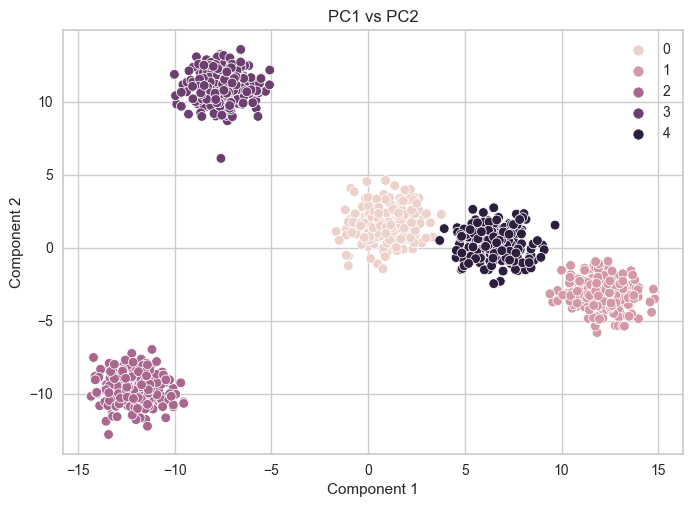

In [8]:
# From lab 8

n = 2 
nPCA = PCA(n_components=n, svd_solver='full')

nPCA.fit(data)

Z1 = nPCA.transform(data)
sns.scatterplot(x=Z1[:, 0], y=Z1[:, 1], hue=KClusterer.labels_)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PC1 vs PC2")
plt.show()

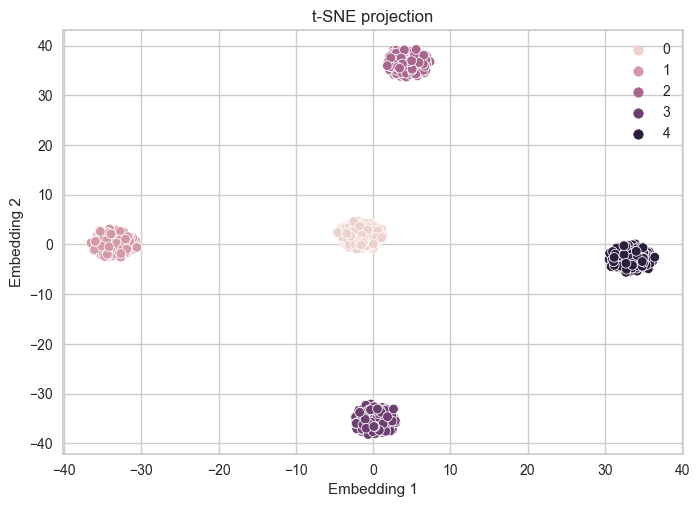

In [9]:
# From Lab 8

tSNEmapper = TSNE(n_components=2,               # How many dimensions to use. Never more than 2 or 3
                  init='random',                # First initialization. Sparse matrices need 'random'.  Otherwise use 'pca'
                  perplexity=100.0,             # Read below
                  learning_rate='auto',         # Related to above. Leave to auto
                  n_iter=5000,                  # Very important to let iterate enough
                  n_iter_without_progress=300,  # Set early stopping
                  metric='euclidean',           # Metric to use to calculate distances.
                  min_grad_norm=1e-7,           # Minimum gradient to continue iterating
                  verbose=0,                    # Verbosity
                  random_state=seed,            # Random seed
                  n_jobs=-1,                    # Parallel processes
                 )

TSNE_embedding = tSNEmapper.fit_transform(data)

sns.scatterplot(x=TSNE_embedding[:, 0], y=TSNE_embedding[:, 1], hue=KClusterer.labels_)
plt.xlabel("Embedding 1")
plt.ylabel("Embedding 2")
plt.title("t-SNE projection")
plt.show()

### Written Answer

The last three steps show that $k = 5$ is the right choice for the number of clusters. PCA and tSNE generate 5 disjoint clusters, which shows that there are 5 well-defined clusters in the data. Moreover, the silhouette plot when $k = 5$ shows less variability in the width of the silhouette bars, indicating lower variance when $k = 5$.

### Q1.5 - <span style="color:red">[30]</span> - Now that you have the number of clusters figured out, use the sample cells with known cell type to update the type of the "unknown" cells in the dataframe `dfc` (which you created in Q1.1) using decision boundaries defined over the t-SNE's first and second embeddings. The decision boundaries that you define could be of any geometric shape (*e.g.*, square) as long as they can perfectly isolate the clusters from each other. Also, plot these:
1.   scatter plot TSNE_embedding_0 vs TSNE_embedding_1, reflecting in a color-coded way, original known cells, unknown cells, and decision boundaries,
2.   scatter plot TSNE_embedding_0 vs TSNE_embedding_1 after updating the cell type of the unknown cells. Use different colors to distinguish the clusters,
3.   scatter plot "cell_feature_1" against "cell_feature_5" color coded by their updated "cell_type". This plot must have a legend indicating what color is referring to what type of cell.

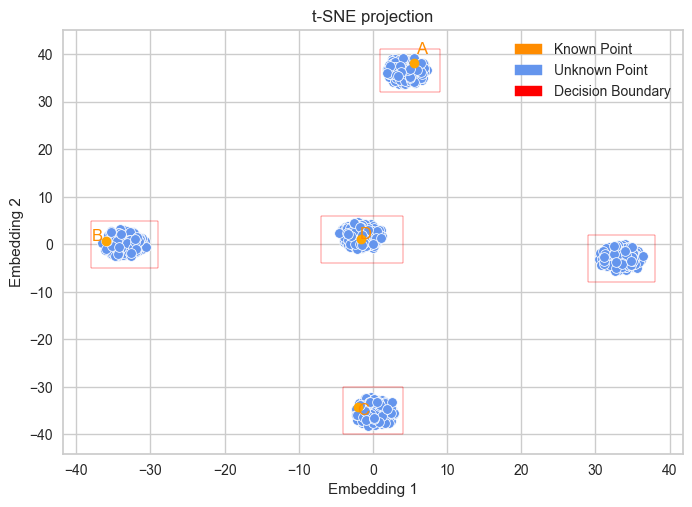

In [10]:
import matplotlib.patches as mpatches

# User-defined decision boundaries. For cluster 0 in the t-SNE plot, we declare that a point is in cluster 0 if
# -7 <= x <= 4 and -4 <= y <= 6, and so on. 

decision_boundaries = [[(-7, 4), (-4, 6)], [(-38, -29), (-5, 5)], [(1, 9), (32, 41)], 
                       [(-4, 4), (-40, -30)], [(29, 38), (-8, 2)]]

# We will map each point in the tSNE embedding to a cluster value between 0 and 4.
clusters_points = {"0": [], "1": [], "2": [], "3": [], "4": []}

# Generate tSNE plot
sns.scatterplot(x=TSNE_embedding[:, 0], y=TSNE_embedding[:, 1], c='cornflowerblue')

plt.xlabel("Embedding 1")
plt.ylabel("Embedding 2")
plt.title("t-SNE projection")

# Plot decision boundaries
for i in range(len(decision_boundaries)):
    rect = plt.Rectangle((decision_boundaries[i][0][0], decision_boundaries[i][1][0]), #(x,y) coordinates
                 abs(decision_boundaries[i][0][1] - decision_boundaries[i][0][0]), # |x_2 - x_1| (length)
                 abs(decision_boundaries[i][1][1] - decision_boundaries[i][1][0]), # |y_2 - y_1| (width)
                 fc = 'none', # No fill
                 ec = 'red')  # Red edges
    plt.gca().add_patch(rect)


# Just a list of the indices in the dataframe.
original_indices = np.arange(len(data))

# Zips together a dictionary of the original indices in the dataframe, together with the point in the
# tSNE embedding that that index maps to.
mapping = dict(zip(original_indices, TSNE_embedding))

# We collect the indices of the points we know about, together with their labels.
known_indices = [(dfc.index[dfc['cell_type'] == 'A'], 'A'), (dfc.index[dfc['cell_type'] == 'B'], 'B'),
                 (dfc.index[dfc['cell_type'] == 'C'], 'C'), (dfc.index[dfc['cell_type'] == 'D'], 'D')
                ]

# Highlight these points on the embedding plot, with a label.
for idx in known_indices:
    plt.plot(mapping[idx[0][0]][0], mapping[idx[0][0]][1], color='orange', marker='o')
    plt.text(mapping[idx[0][0]][0] * (1.05), mapping[idx[0][0]][1] * (1.05), idx[1], fontsize=12, color='darkorange')
    
# Custom legend.
leg = [mpatches.Patch(color='darkorange', label='Known Point'), 
       mpatches.Patch(color='cornflowerblue', label = 'Unknown Point'),
       mpatches.Patch(color='red', label="Decision Boundary")]

plt.legend(handles=leg)

plt.show()


The predictions are below.


<Axes: title={'center': 't-SNE projection'}, xlabel='Embedding 1', ylabel='Embedding 2'>

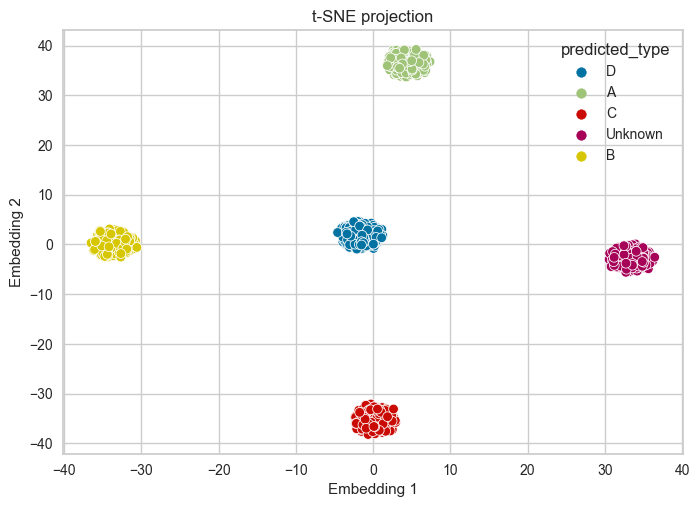

In [11]:
# For each point in the mapping, iterate over the decision boundaries and figure out which box the
# point belongs to. Once done, append the corresponding *index* of this point to the dictionary entry
# for the appropriate cluster.

for i in range(len(mapping)):
    for j in range(len(decision_boundaries)):
        if decision_boundaries[j][0][0] <= mapping[i][0] <= decision_boundaries[j][0][1] and \
           decision_boundaries[j][1][0] <= mapping[i][1] <= decision_boundaries[j][1][1]:
                clusters_points[str(j)].append(i)

types = [' ' for i in range(len(dfc))]

# Map integer cluster values to cell types A, B, C, D or unknown.

for key, val in clusters_points.items():
    for v in val:
        if key == '0':
            types[v] = 'D'
        elif key == '1':
            types[v] = 'B'
        elif key == '2':
            types[v] = 'A'
        elif key  == '3':
            types[v] = 'C'
        else:
            types[v] = 'Unknown'
dfc['predicted_type'] = types # Add column to dataframe

print("The predictions are below.")

plt.xlabel("Embedding 1")
plt.ylabel("Embedding 2")
plt.title("t-SNE projection")

# Plot points, hued by predicted cluster.
sns.scatterplot(x=TSNE_embedding[:, 0], y=TSNE_embedding[:, 1], hue=dfc['predicted_type'])

<Axes: xlabel='cell_feature_1', ylabel='cell_feature_5'>

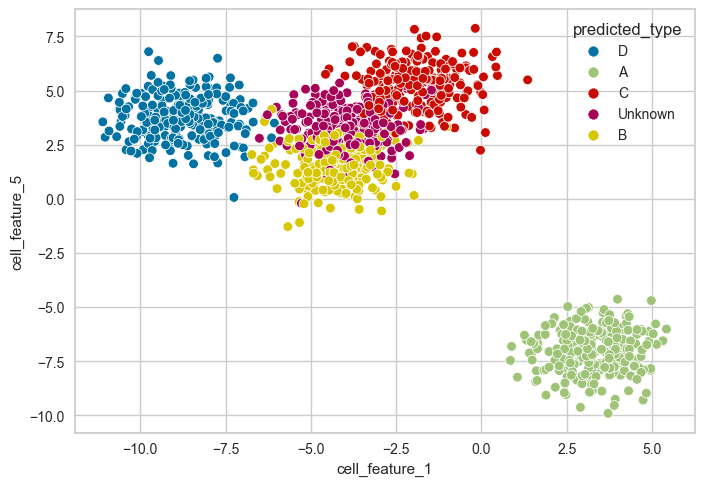

In [12]:
# Plot cell_feature_1 versus cell_feature_5, hued by predicted cluster.

sns.scatterplot(x=dfc['cell_feature_1'], y=dfc['cell_feature_5'], hue=dfc['predicted_type'])

### Q1.6 - <span style="color:red">[15]</span> - This question in independent of Q1.5. This time, we want to update the cell type of the unknown cells using a different method. We have the number of clusters figured out in Q1.4 already. Use the sample cells with known cell type to update the type of the "unknown" cells in the dataframe `dfc` (which you created in Q1.1) using `kmeans.predict()`. Finally, scatter plot "cell_feature_1" against "cell_feature_5" color coded by their updated "cell_type". This plot must have a legend indicating what color is referring to what type of cell.

<Axes: xlabel='cell_feature_1', ylabel='cell_feature_5'>

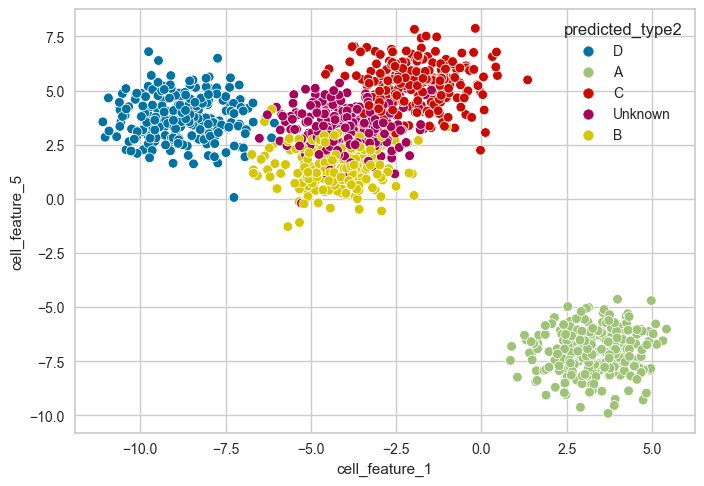

In [13]:
# We simply use our KClusterer from before on the data.

df2 = dfc.copy()

df2['cell_type'] = KClusterer.predict(data)

# Map integer cluster values to cell types.
df2['predicted_type2'] = df2['cell_type'].map({0: 'D', 1 : 'B', 2 : 'A', 3 : 'C', 4 : 'Unknown'})

# Generate the plot as before.
sns.scatterplot(x=dfc['cell_feature_1'], y=dfc['cell_feature_5'], hue=df2['predicted_type2'])